### University of California, Berkeley
### Chem 274B: Software Engineering Fundamentals for Molecular Sciences 
### Final Project
### Creators:  Francine Bianca Oca, Kassady Marasigan and Korede Ogundele
### Date Created: December 5, 2023

This file contains functions and plots that pertain to our allele frequency model.

In [35]:
import random

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px

# 1. Bar graph that displays allele frequency of a chosen generation

In [2]:
def plot_generation_counts(generation_number):
    """
    This function plots the number of each individuals that have a certain genotype as a bar graph

    Parameters
    ----------
    generation_number : int
    The generation number whose allele frequencies we would like to look at

    Returns
    -------
    A bar graph with ___

    """
    # open text file containing generation counts
    with open('Data/generation_counts.txt', 'r') as file:
        lines = file.readlines()

    # extract counts for the specified generation
    for line in lines:
        if line.startswith(f'Generation {generation_number}:'):
            counts_line = line.strip().split(', ')
            GG_count = int(counts_line[0].split('=')[-1])
            Gg_count = int(counts_line[1].split('=')[-1])
            gg_count = int(counts_line[2].split('=')[-1])

            # get counts as a percentage of total population
            total_population = GG_count + Gg_count + gg_count
            homozygous_dominant_percentage = GG_count / total_population
            heterozygous_percentage = GG_count / total_population
            recessive_percentage = gg_count / total_population
            
            break
    else:
        # return an error if generation number is not found
        print(f"ERROR: Generation {generation_number} not found.")
        return

    # Plot
    labels = ['Homozygous Dominant', 'Heterozygous', 'Recessive']
    counts = [homozygous_dominant_percentage, heterozygous_percentage, recessive_percentage]

    plt.bar(labels, counts, color=['royalblue', 'mediumslateblue', 'mediumorchid'])
    plt.title(f'Allele Percentages for Generation {generation_number}')
    plt.xlabel('Genotype')
    plt.ylabel('Proportion of Population')
    plt.show()

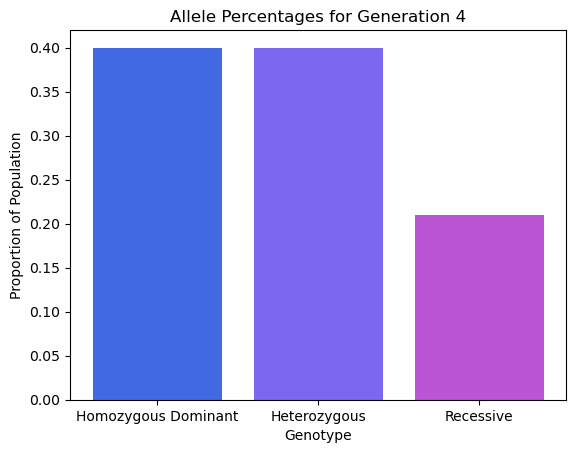

In [3]:
# Example usage: Plot counts for Generation 10
plot_generation_counts(4)

In [6]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [7]:
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

# 2. Filled area plot to visualize how allele frequency changes over 100 generations

In [64]:
# open text file containing generation counts
with open('Data/generation_counts.txt', 'r') as file:
    generation_info = file.readlines()

# get all dominant and recessive counts
def extract_generation_counts_to_df(filename):
    """
    This function extracts number of each individuals of each phenotype from the generation count output text and puts the data into a dataframe. The resulting dataframe can be used to produce plots.

    Parameters
    ----------
    filename : str
    Name of file you'd like to extract counts from (include file extension)
    
    Returns
    -------
    df : Pandas dataframe
    A pandas dataframe with generation counts. It's much easier to make graphs with seaborn and plotly once you have a dataframe.
    """
    
    # open file and split into lines
    with open(filename, 'r') as file:
        lines = file.readlines()

    # initiate empty lists
    homozygous_dominant_counts = []
    heterozygous_counts = []
    recessive_counts = []
    
    # split text into genotype counts
    for line in lines:
        if line.startswith('Generation'):
            counts_line = line.strip().split(', ')
            GG_count = int(counts_line[0].split('=')[-1])
            Gg_count = int(counts_line[1].split('=')[-1])
            gg_count = int(counts_line[2].split('=')[-1])

            # append counts to corresponding list
            homozygous_dominant_counts.append(GG_count)
            heterozygous_counts.append(Gg_count)
            recessive_counts.append(gg_count)

    # create dataframe
    generations = list(range(0, 100))
    df = pd.DataFrame({'Generation Number': generations, 'Homozygous Dominant Counts': homozygous_dominant_counts, 'Heterozygous Counts': heterozygous_counts, 'Recessive Counts': recessive_counts})
            

    return df

In [1]:
area_plot_df = extract_generation_counts_to_df('Data/generation_counts.txt')
area_plot_df.head()

NameError: name 'extract_generation_counts_to_df' is not defined

In [75]:
fig = px.area(area_plot_df, x='Generation Number', y=['Homozygous Dominant Counts','Heterozygous Counts', 'Recessive Counts'])
fig.show()


# 3. add a function to show display counts of individuals in a state in a given generation

arguments should be generation number and state